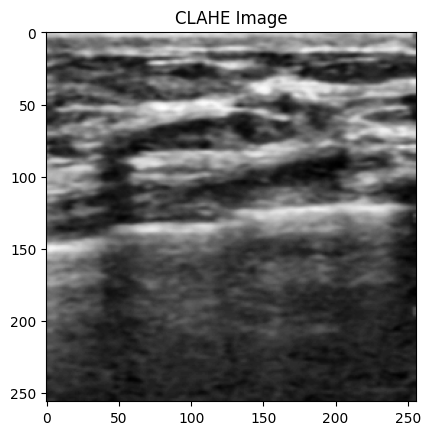

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the ultrasound image
image_path = r'C:\Users\Marchelli\Downloads\Tugas Akhir\BUSBRA\BUSBRA\Images\BIRADS_2\bus_0072-r.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize the image to 256x256
image_resized = cv2.resize(image, (256, 256))

# Apply Gaussian filter to reduce noise
image_blurred = cv2.GaussianBlur(image_resized, (5, 5), 0)

# Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image_clahe = clahe.apply(image_blurred)

# Display the CLAHE image
plt.imshow(image_clahe, cmap='gray')
plt.title('CLAHE Image')
plt.show()


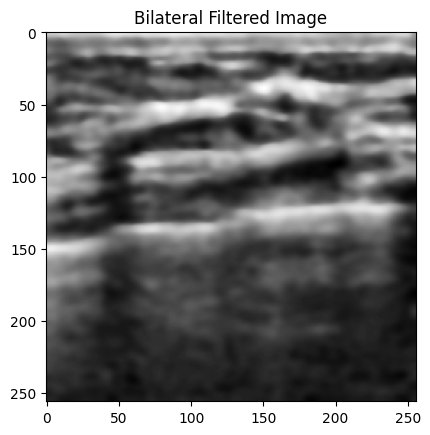

In [9]:
# Apply Bilateral filter to preserve edges
image_bilateral = cv2.bilateralFilter(image_clahe, 9, 75, 75)

# Display the Bilateral filtered image
plt.imshow(image_bilateral, cmap='gray')
plt.title('Bilateral Filtered Image')
plt.show()


In [10]:
# Compute the gradient using Sobel operator
grad_x = cv2.Sobel(image_bilateral, cv2.CV_64F, 1, 0, ksize=5)
grad_y = cv2.Sobel(image_bilateral, cv2.CV_64F, 0, 1, ksize=5)

# Compute the magnitude and angle of the gradient
magnitude = np.sqrt(grad_x**2 + grad_y**2)
angle = np.arctan2(grad_y, grad_x)

# Normalize the magnitude to enhance edges
magnitude_normalized = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)


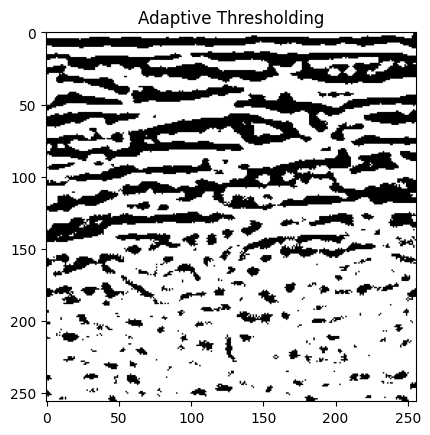

In [11]:
# Apply adaptive thresholding to separate tumor from background
threshold = cv2.adaptiveThreshold(image_bilateral, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

# Display the thresholded image
plt.imshow(threshold, cmap='gray')
plt.title('Adaptive Thresholding')
plt.show()


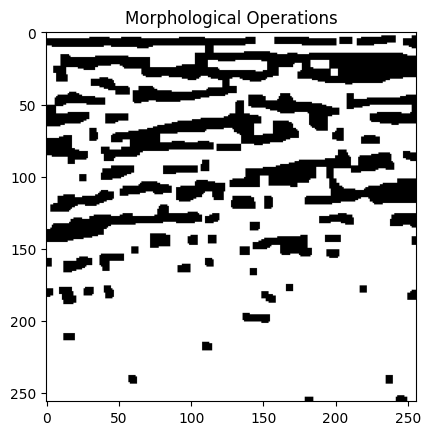

In [12]:
# Apply morphological operations to clean up the image
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

# Display the morphologically processed image
plt.imshow(closing, cmap='gray')
plt.title('Morphological Operations')
plt.show()


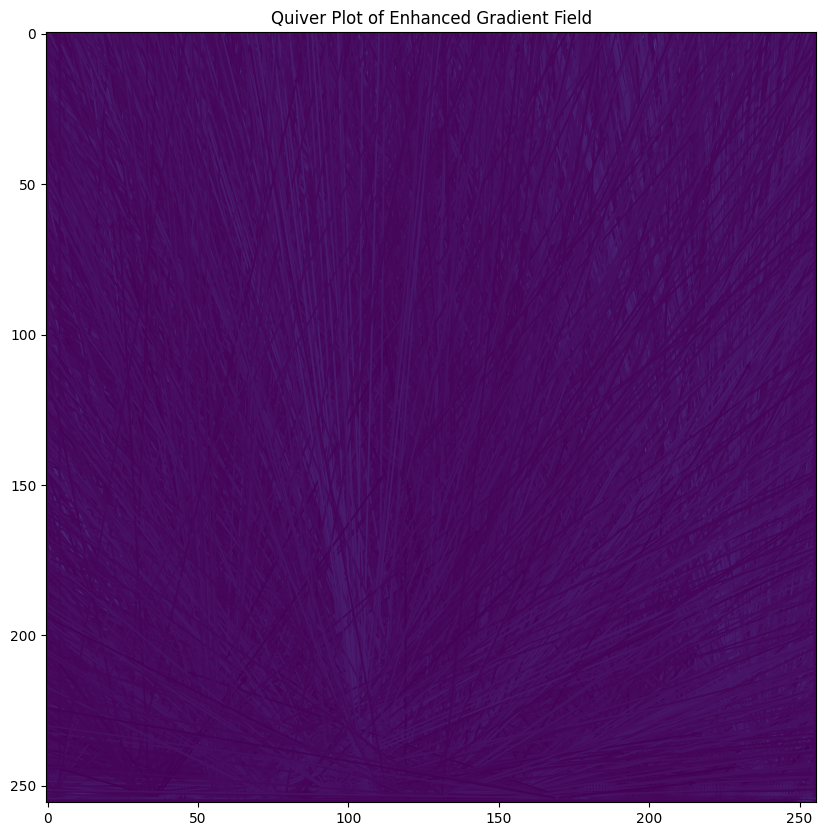

In [13]:
# Generate a quiver plot
Y, X = np.mgrid[0:image_resized.shape[0], 0:image_resized.shape[1]]

plt.figure(figsize=(10, 10))
plt.imshow(image_resized, cmap='gray', alpha=0.5)
plt.quiver(X, Y, grad_x, grad_y, magnitude_normalized, scale=50, color='red')
plt.title('Quiver Plot of Enhanced Gradient Field')
plt.show()
